In [15]:
import os
import getpass
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)


np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)
pd.set_option('max_rows', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
path = '../data/'

e = os.path.join(path,'bpic13_all.csv')
e = pd.read_csv(e)
f = os.path.join(path,'Sepsis_Cases_processed.csv')
f = pd.read_csv(f)
g = os.path.join(path,'road_traffic.csv')
g = pd.read_csv(g)
h = os.path.join(path,'bpic15_2.csv')
h = pd.read_csv(h)
df_name = {
    'e':'bpic13_all',
    'f':'Sepsis',
    'g':'Road_traffic',
    'h':'bpic15'
}

df_dict = {
    'e': e,
    'f': f,
    'g': g,
    'h': h,
}

range_dict = {
    'e': range(2,22,2),
    'f': range(3,11, 1),
    'g': range(1,6,1),
    'h': range(5, 30, 5)
}

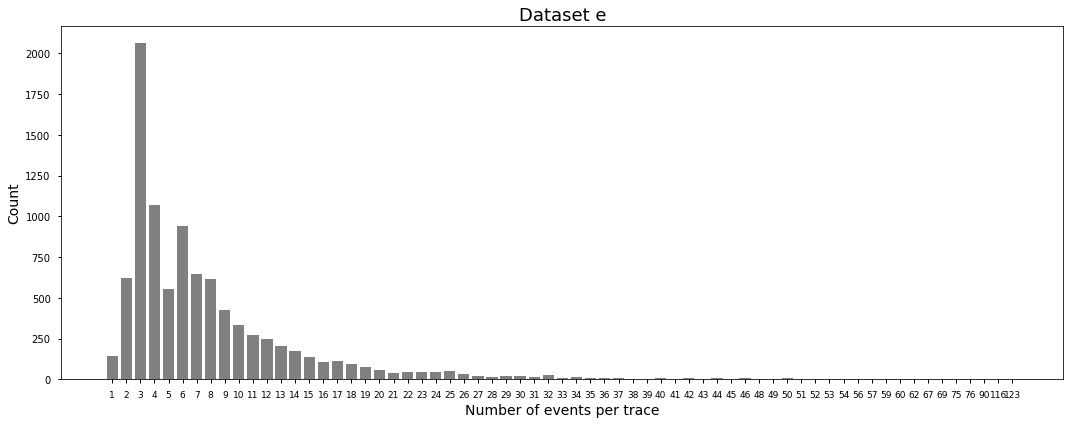

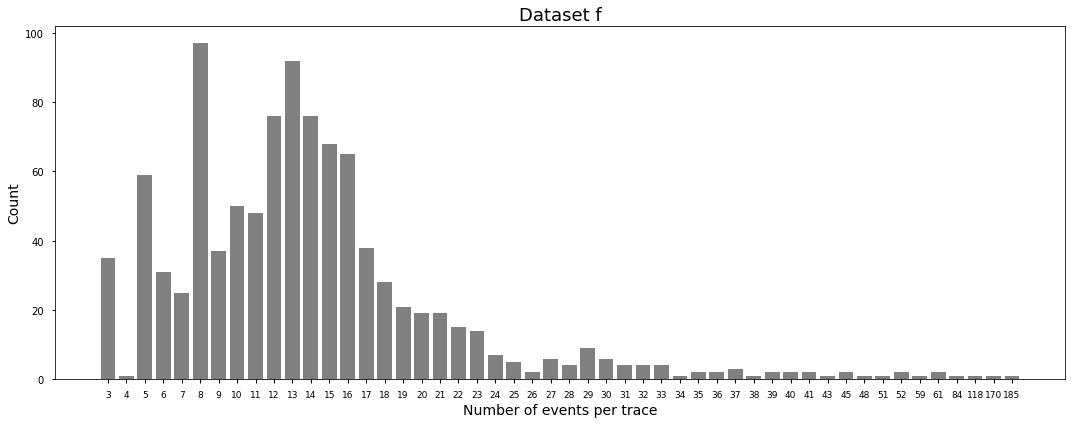

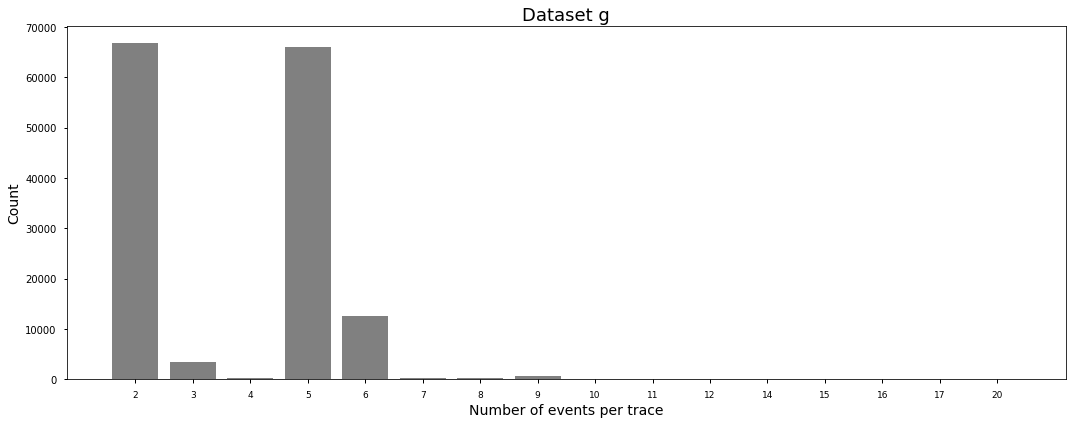

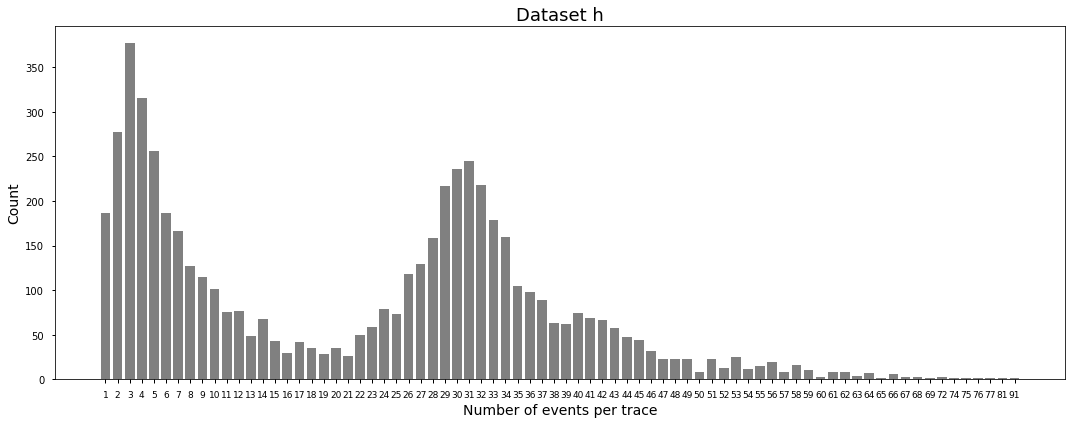

In [17]:
# i = 0
for key, dataset in df_dict.items():
    fig = plt.figure(figsize=(15, 6)) 
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"], color='gray')
    plt.xticks(rotation=0, fontsize=9)
    plt.xlabel("Number of events per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    plt.tight_layout()
    plt.plot()

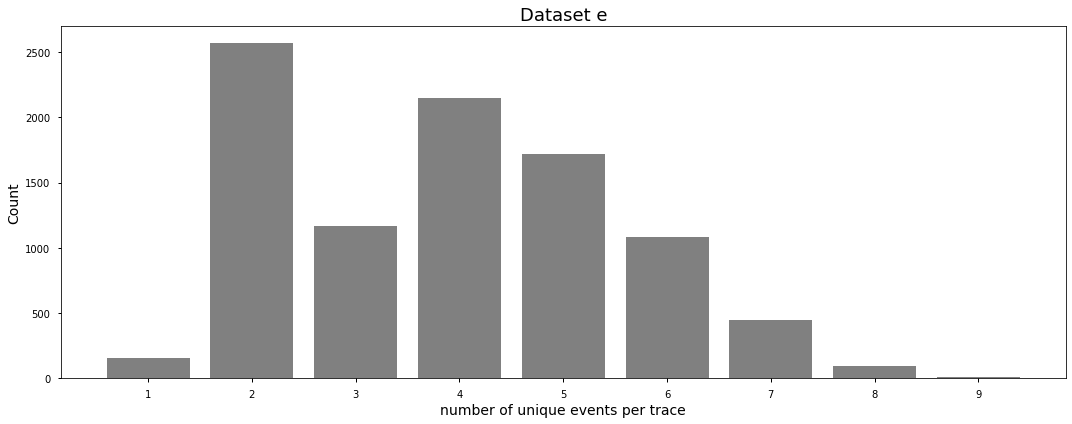

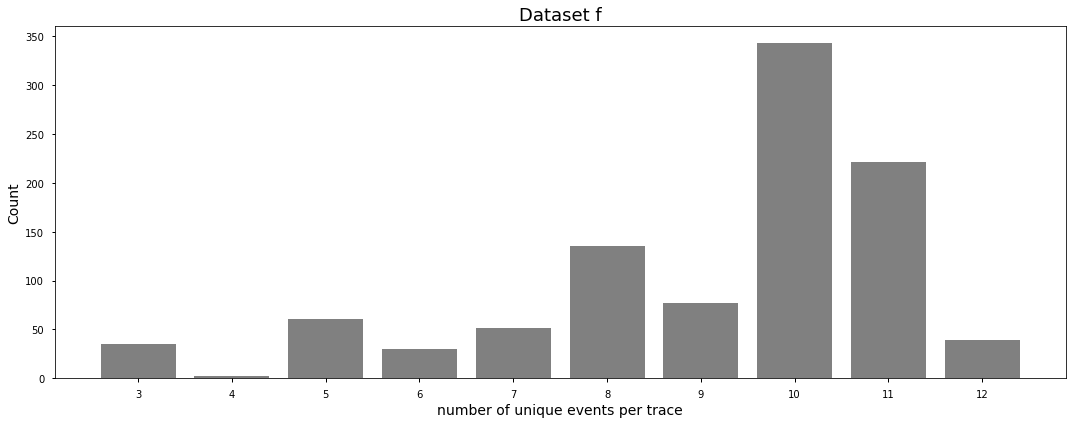

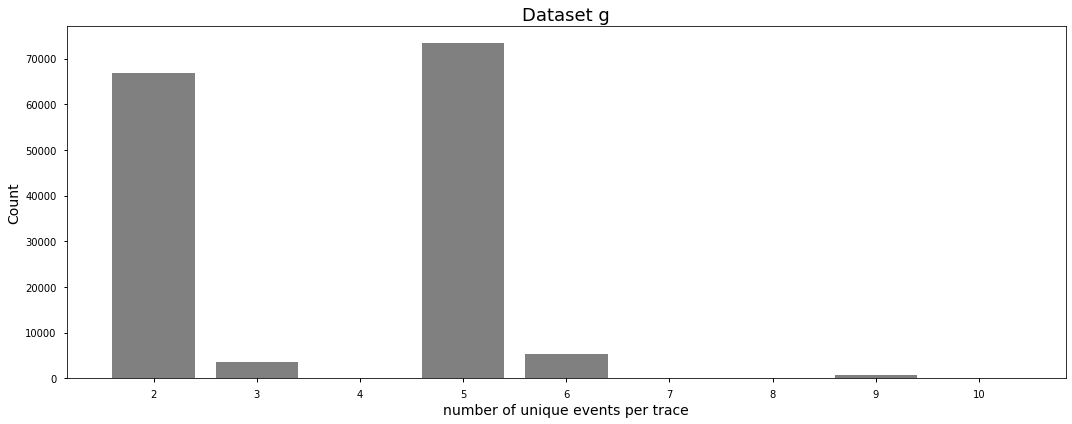

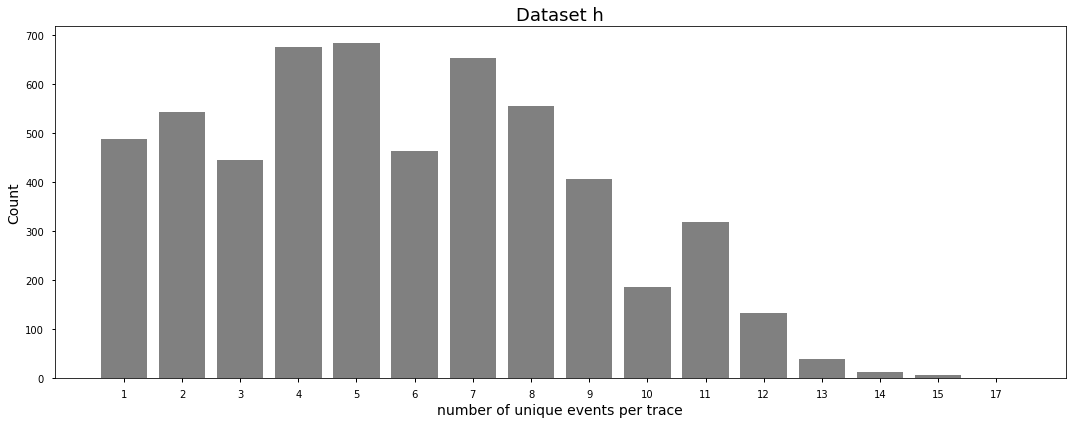

In [18]:
for key, dataset in df_dict.items():
    fig = plt.figure(figsize=(15, 6)) 
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'nunique'})["ActivityID"], color='gray')
    plt.xlabel("number of unique events per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    plt.tight_layout()
    plt.plot()

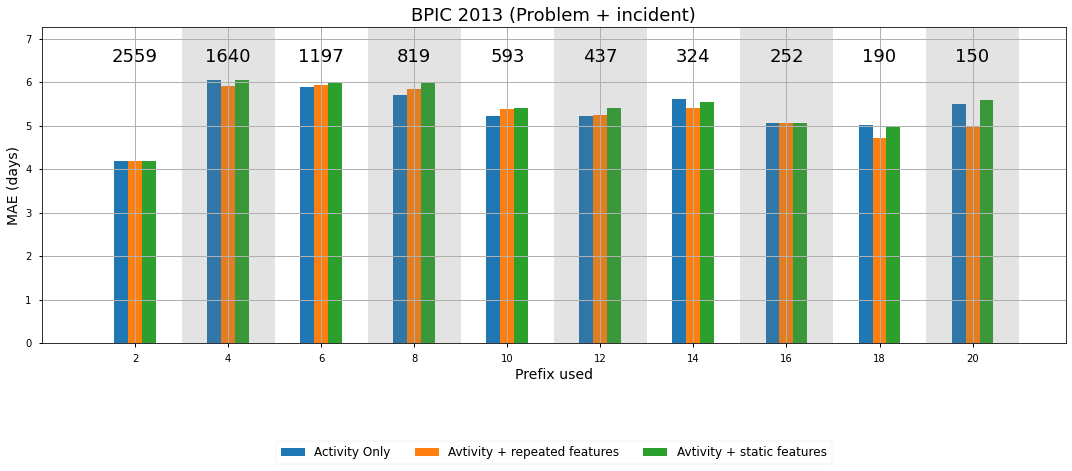

In [19]:
dataset = 'e'
cases = []
labels= []

## Load baseline:
path = '../output/maes/low_censored/'
low_censored = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases.append(low_censored)
labels.append("Activity Only")

path = '../output/maes/low_censored_dyn/'
low_censored_dynamic = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases.append(low_censored_dynamic)
labels.append("Avtivity + repeated features")

path = '../output/maes/low_censored_sta/'
low_censored_static = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases.append(low_censored_static)
labels.append("Avtivity + static features")


X = np.array(range_dict[dataset])

f, ax = plt.subplots(figsize=(15,7))
plt.style.use(['seaborn-notebook'])
for j,case in enumerate(cases):
    steps = [-0.3, 0, 0.3]
    width=0.3    
    ax.bar(
        x      = X + steps[j], 
        height = case,
        width  = width,
        label  = labels[j]
    );
text_counts = pickle.load(open(path + dataset +'_GRU.pkl', 'rb'))\
                            .sort_values(['prefix','MAE'])\
                            .drop_duplicates(subset=['prefix'], keep='first')\
                            .reset_index(drop=True)\
                            ["test_size"]\
                            .values

for i, span in enumerate(X):
    ax.axvspan(span-1, span+1, facecolor='#767676', alpha=(i%2)*0.2)
    ax.text(span,ax.get_ylim()[1] +0.1,'{:1.0f}'.format(text_counts[i]),ha="center", fontsize=18);

ax.set_xticks(range_dict[dataset])
ax.set_xlabel("Prefix used", fontsize=14)
ax.set_ylabel("MAE (days)", fontsize=14)
ax.set_title("BPIC 2013 (Problem + incident)", fontsize=18)
ax.grid()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4, frameon = True,
          fancybox =True, shadow = False, framealpha=0.8,fontsize=12)

plt.margins(y=0.2)
plt.tight_layout()
plt.show()

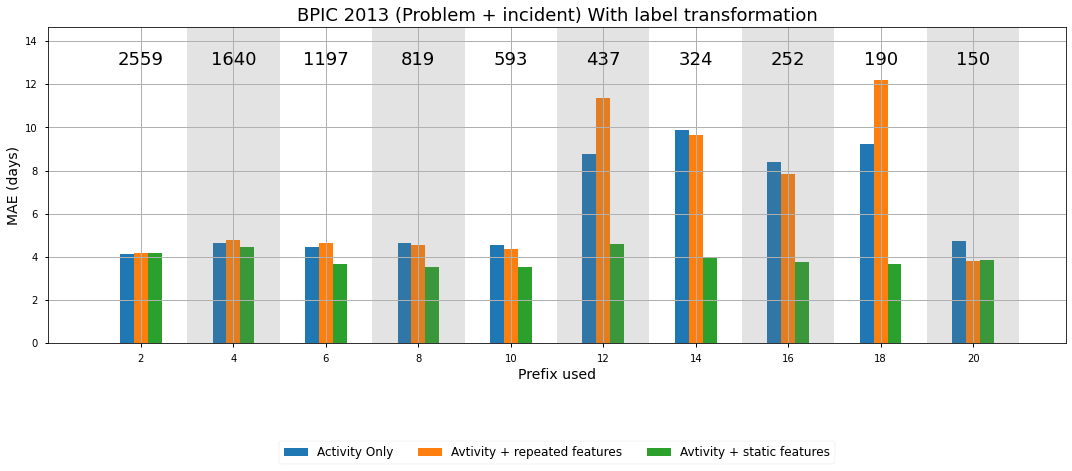

In [20]:
dataset = 'e'
cases_trans = []
labels= []

## Load baseline:
path = '../output/maes/low_censored_trans/'
low_censored = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases_trans.append(low_censored)
labels.append("Activity Only")

path = '../output/maes/low_censored_dyn_trans/'
low_censored_dynamic = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases_trans.append(low_censored_dynamic)
labels.append("Avtivity + repeated features")

path = '../output/maes/low_censored_sta_trans/'
low_censored_static = list(np.squeeze(pickle.load(open(path + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases_trans.append(low_censored_static)
labels.append("Avtivity + static features")


X = np.array(range_dict[dataset])

f, ax = plt.subplots(figsize=(15,7))
plt.style.use(['seaborn-notebook'])
for j,case in enumerate(cases_trans):
    steps = [-0.3, 0, 0.3]
    width=0.3
    ax.bar(
        x      = X + steps[j], 
        height = case,
        width  = width,
        label  = labels[j]
    );
text_counts = pickle.load(open(path + dataset +'_GRU.pkl', 'rb'))\
                            .sort_values(['prefix','MAE'])\
                            .drop_duplicates(subset=['prefix'], keep='first')\
                            .reset_index(drop=True)\
                            ["test_size"]\
                            .values

for i, span in enumerate(X):
    ax.axvspan(span-1, span+1, facecolor='#767676', alpha=(i%2)*0.2)
    ax.text(span,ax.get_ylim()[1] +0.1,'{:1.0f}'.format(text_counts[i]),ha="center", fontsize=18);

ax.set_xticks(range_dict[dataset])
ax.set_xlabel("Prefix used", fontsize=14)
ax.set_ylabel("MAE (days)", fontsize=14)
ax.set_title("BPIC 2013 (Problem + incident) With label transformation", fontsize=18)
ax.grid()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4, frameon = True,
          fancybox =True, shadow = False, framealpha=0.8,fontsize=12)

plt.margins(y=0.2)
plt.tight_layout()
plt.show()

#### 

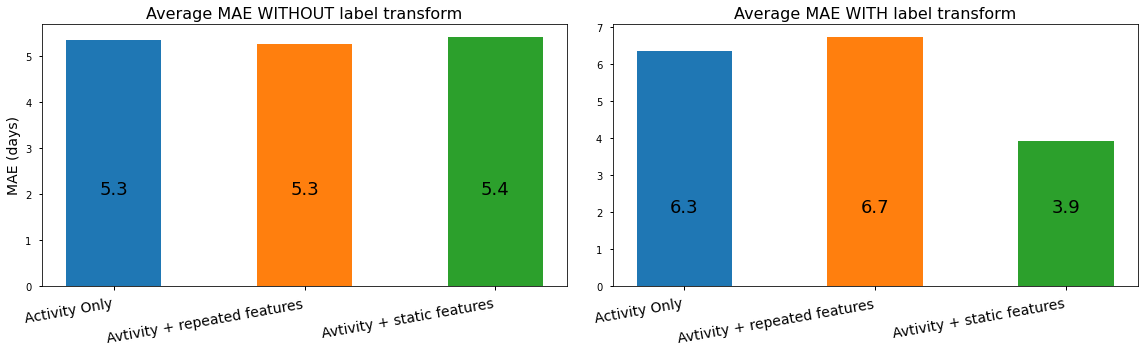

In [21]:
fig, ax = plt.subplots(figsize=(16,5), squeeze=True)
my_cmap = plt.get_cmap("tab10")
plt.subplot(1,2,1)
y = [np.mean(x) for x in cases]
plt.bar(x=labels, height=y, width= 0.5, color=[my_cmap(0), my_cmap(1), my_cmap(2)])
# plt.ylim(ymin=0,ymax=70)
plt.ylabel("MAE (days)", fontsize=14)
plt.xticks(fontsize=14, rotation=10, ha='right')
plt.title("Average MAE WITHOUT label transform", fontsize=16)
for i, span in enumerate(labels):
    plt.text(x = i, y= 2, s='{:1.1f}'.format(y[i]),ha="center", fontsize=18);

plt.subplot(1,2,2)
y = [np.mean(x) for x in cases_trans]
plt.bar(x=labels, height=y, width= 0.5, color=[my_cmap(0), my_cmap(1), my_cmap(2)])
# plt.ylim(ymin=0,ymax=70)
plt.xticks(fontsize=14, rotation=10, ha='right')
plt.title("Average MAE WITH label transform", fontsize=16)
for i, span in enumerate(labels):
    plt.text(x = i, y= 2, s='{:1.1f}'.format(y[i]),ha="center", fontsize=18);


plt.tight_layout()
plt.show()